# **Department of Computing**

## **CS 471: Machine Learning (3+1)**

**Class**: BSCS 12  
**Lab 4**: Logistic Regression


#**Task.01**

**Setting Up the Environment**

In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn

**Loading the Dataset**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load the iris dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'species']
iris = pd.read_csv(url, header=None, names=column_names)

In [5]:
# Display the first few rows of the dataset
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Data Exploration**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

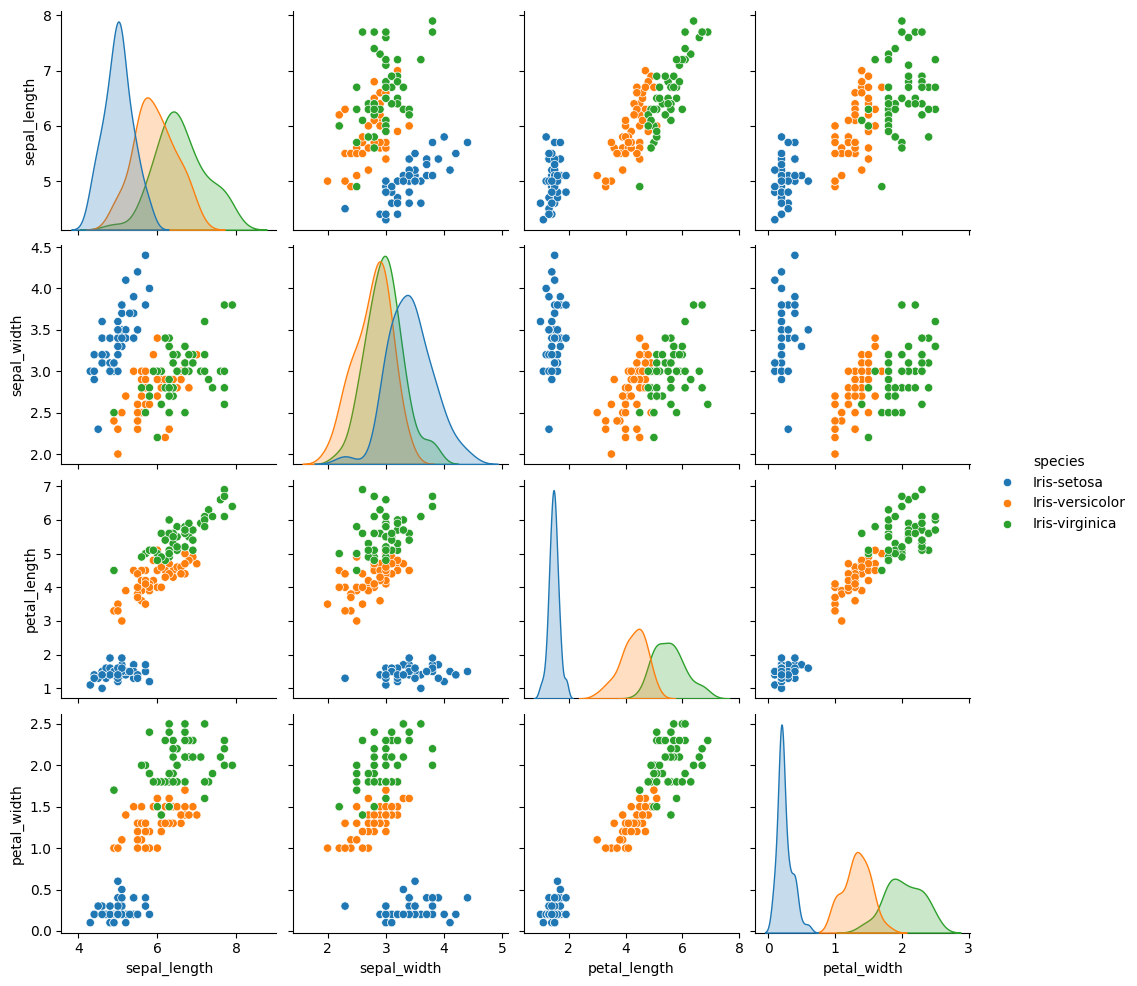

In [6]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue='species')
plt.show()

In [7]:
# Check for missing values
print(iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


**Data Preprocessing**

In [8]:
# Binarize the target variable
iris['target'] = np.where(iris['species'] == 'Iris-virginica', 1, 0)
# Drop the original species column
iris = iris.drop(columns=['species'])

In [9]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [10]:
# Split the data into features and target
X = iris.drop(columns=['target'])
y = iris['target']

In [19]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [20]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


**Feature Scaling**

In [21]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data:")
print(X_train_scaled[:5])


Scaled training data:
[[-0.15627601 -0.216062    0.27459976  0.00215616]
 [-0.27804953 -0.216062    0.21807837  0.13152571]
 [-0.88691711  0.91121799 -1.30799921 -1.2915393 ]
 [-0.88691711  1.58758598 -1.19495643 -1.2915393 ]
 [-1.25223766  0.68576199 -1.19495643 -1.2915393 ]]


**Model Training**

In [22]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression()
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[ 0.2141616  -0.40832088  2.15695972  2.94979588]]
Intercept: [-3.61474864]


**Model Evaluation**

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Confusion Matrix:
 [[19  0]
 [ 2  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30



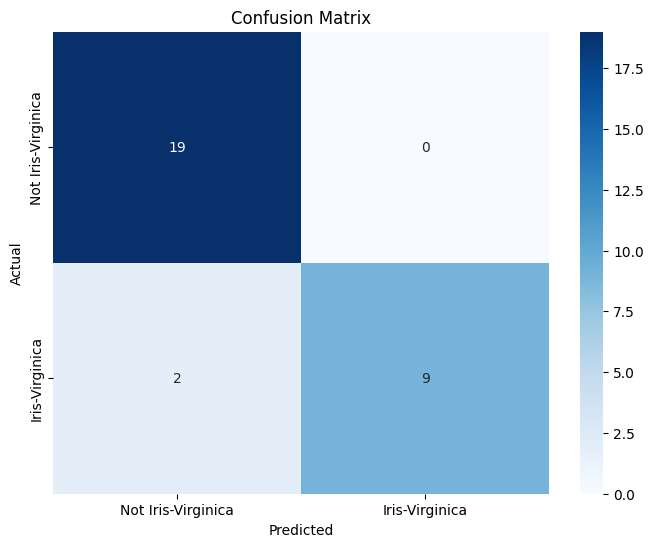

In [25]:
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Not Iris-Virginica', 'Iris-Virginica'],
 yticklabels=['Not Iris-Virginica', 'Iris-Virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


1.    By keeping the random state of 42, the model was giving 100% accuracy and perfect confusion matrices.
2.    I changed the state to 20, so as to get the accuracy of almost 93% and a bit imperfect values of confusion matrix.

#**Mini Challenge**

**Loading the Dataset**

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
column_names = ['variance','skewness','curtosis','entropy','class']
bank_dataset = pd.read_csv("/content/data_banknote_authentication.txt", header=None, names=column_names)
# Display the first few rows of the dataset
print(bank_dataset.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


**Data Exploration**

1.   Making Pairplots

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

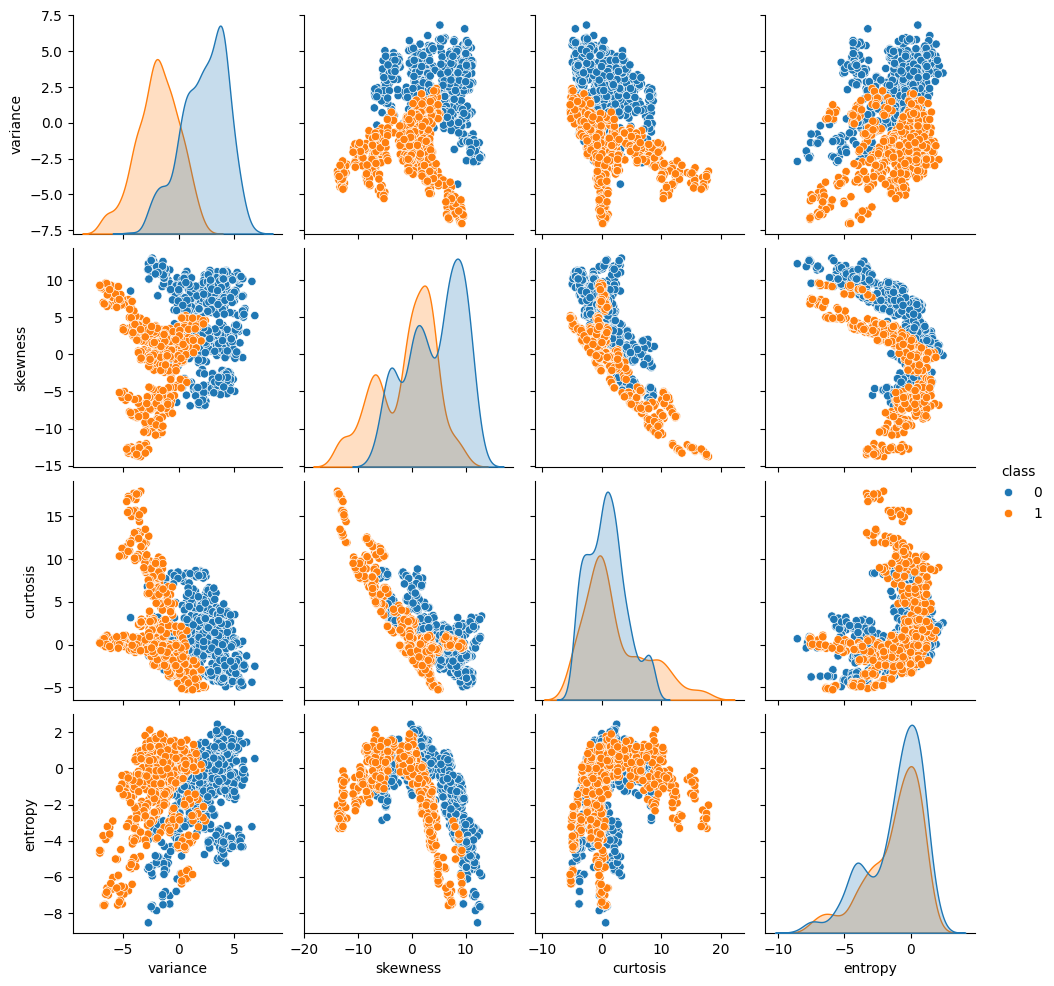

In [31]:
# Visualize the distribution of each feature
sns.pairplot(bank_dataset, hue='class')
plt.show()

2.  Checking Null Values

In [32]:
# Check for missing values
print(bank_dataset.isnull().sum())

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


3. Checking Dataset's Information

In [34]:
bank_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


4.  Plotting histograms

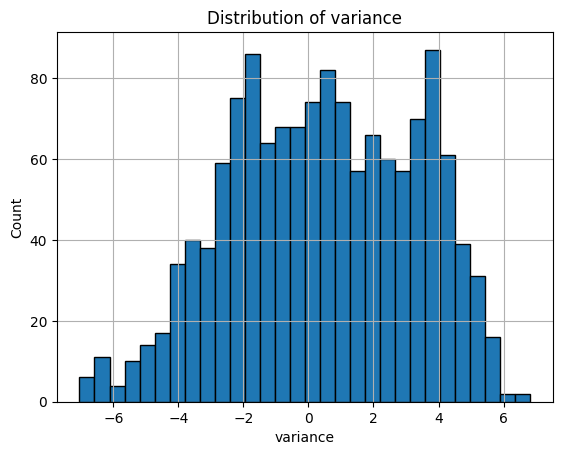

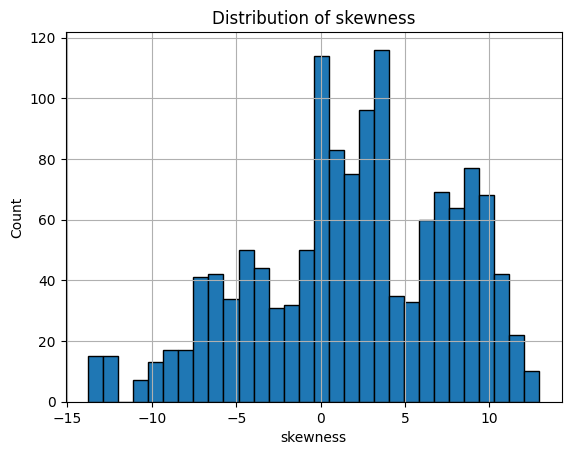

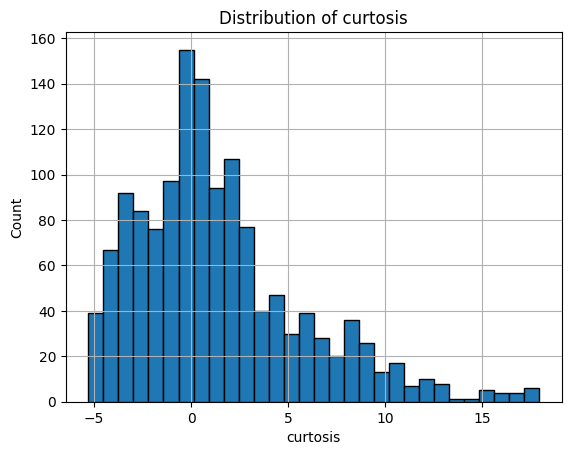

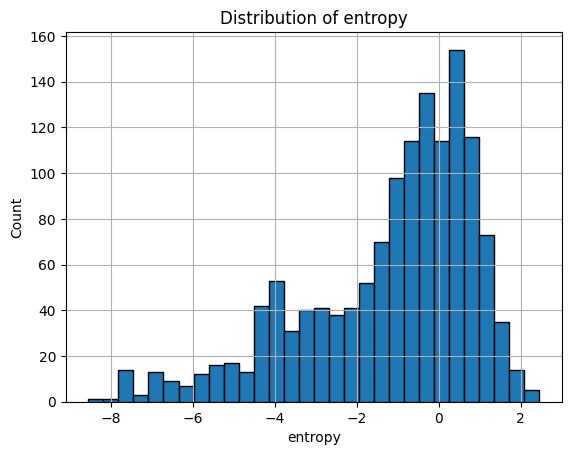

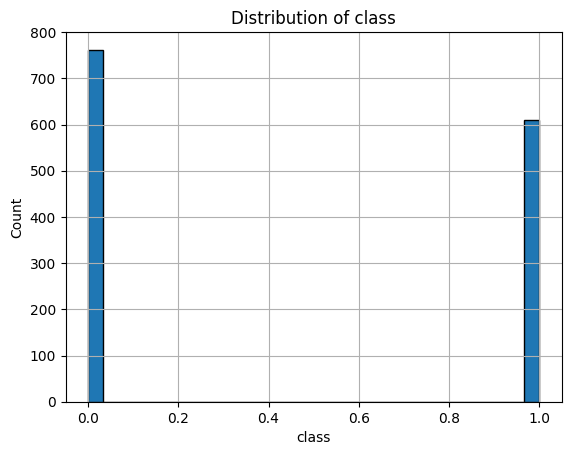

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
for col in column_names:
    bank_dataset[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


5.  Plotting Boxplots

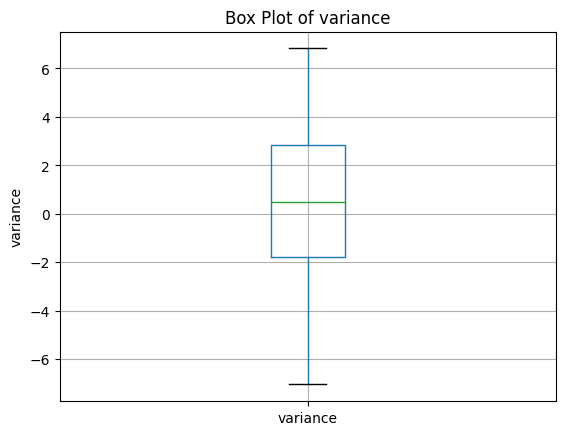

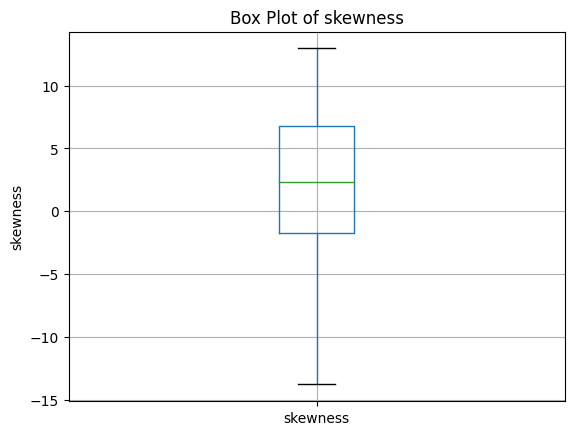

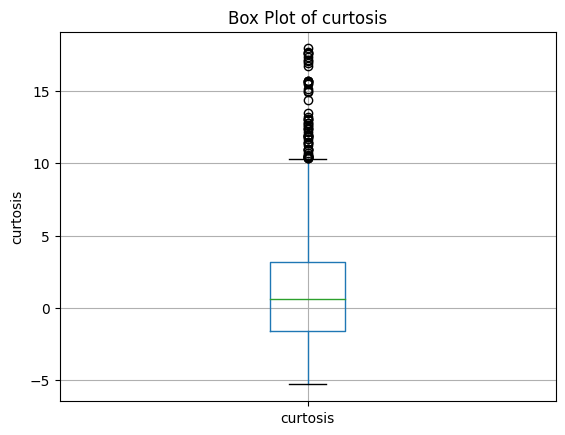

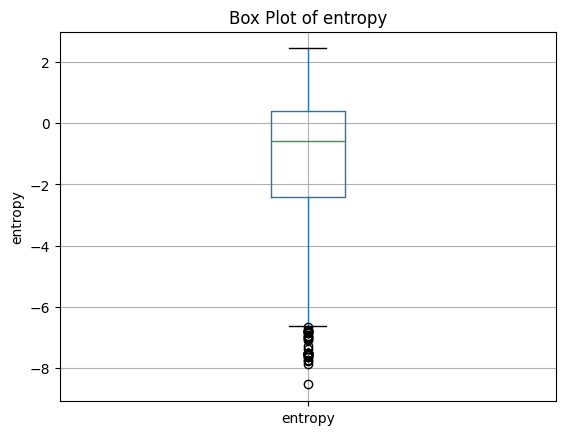

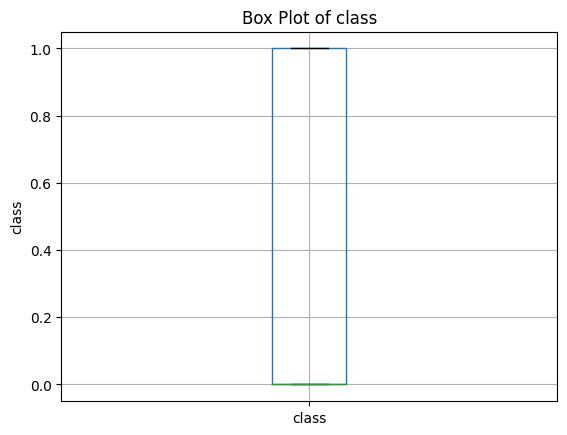

In [38]:
for col in column_names:
    bank_dataset.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


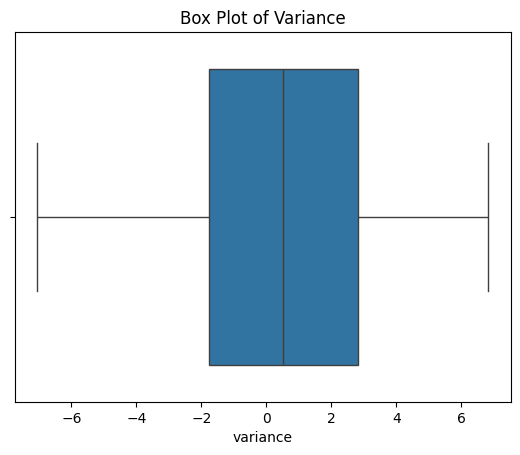

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


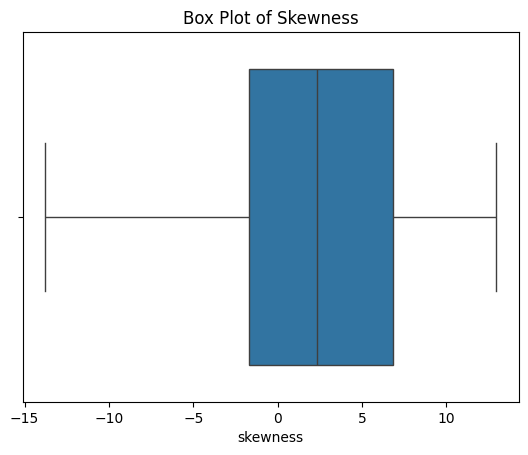

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


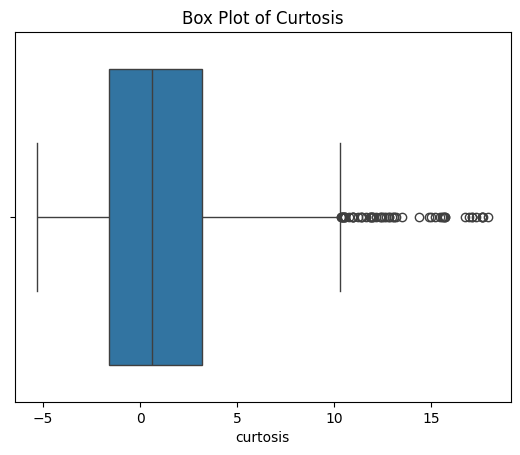

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


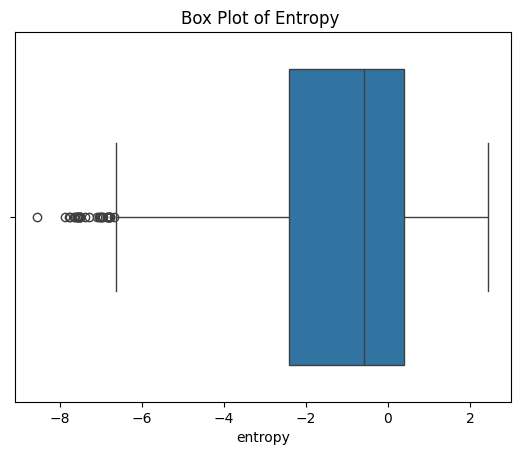

In [43]:
sns.boxplot(x='variance', data=bank_dataset)
plt.title('Box Plot of Variance')
plt.show()
sns.boxplot(x='skewness', data=bank_dataset)
plt.title('Box Plot of Skewness')
plt.show()
sns.boxplot(x='curtosis', data=bank_dataset)
plt.title('Box Plot of Curtosis')
plt.show()
sns.boxplot(x='entropy', data=bank_dataset)
plt.title('Box Plot of Entropy ')
plt.show()

6. Checking for Imbalance

In [40]:
class_counts = bank_dataset['class'].value_counts()

# Print the results
print(f"Rows with class 0: {class_counts[0]}")
print(f"Rows with class 1: {class_counts[1]}")

Rows with class 0: 762
Rows with class 1: 610


*The dataset is imbalanced and will be tackled with setting class weights as "balanced", while applying logistic regression.*

7.  Making Correlation Map

In [44]:
#correlation matrix
corr_map = bank_dataset.corr()
print(corr_map)

          variance  skewness  curtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


<Axes: >

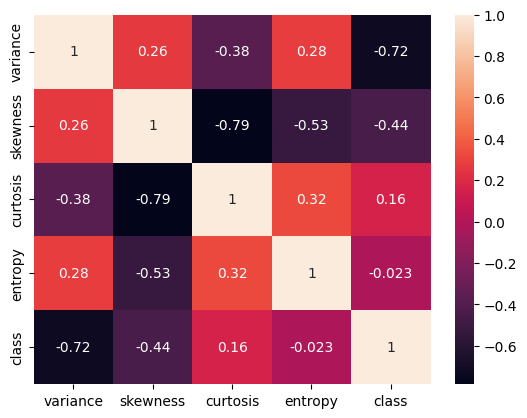

In [46]:
# plotting correlation matrix
sns.heatmap(corr_map, annot=True)

**Data Preprocessing**

As we already have all columns with numerical values, there is no need to change the data type of any feature.

In [47]:
# Split the data into features and target
X = bank_dataset.drop(columns=['class'])
y = bank_dataset['class']

In [48]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1097, 4)
Testing set shape: (275, 4)


**Feature Scaling**

In [50]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled training data:")
print(X_train_scaled[:5])
print("\nScaled testing data:")
print(X_test_scaled[:5])

Scaled training data:
[[-0.6391558   1.80557961 -0.18836535 -3.05096841]
 [ 0.82188925  0.85239902 -0.59407847  0.60345479]
 [-1.65703344 -1.63328321  2.38386151 -0.34235536]
 [ 1.72886098  0.32863093 -0.74807722  1.08444894]
 [ 0.11397258  0.2059923   0.32509151  0.53465595]]

Scaled testing data:
[[ 0.39886742  0.76609776 -0.39003127 -0.58781728]
 [-0.24941276  1.07705921 -1.07095774 -0.64423373]
 [-0.13359364  0.88524111 -0.82182311 -0.94294857]
 [-0.76810147  1.71157861  0.36621015 -1.78032792]
 [ 0.70055958  1.27867084 -1.09723952 -0.12977509]]


#**Model Training (Without Regualrization)**

In [76]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced', random_state=20)
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=20)

In [77]:
# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [[-4.75946787 -4.6793553  -4.28766013  0.26363834]]
Intercept: [-1.3420231]


**Model Evaluation**

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9781818181818182
Confusion Matrix:
 [[144   4]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



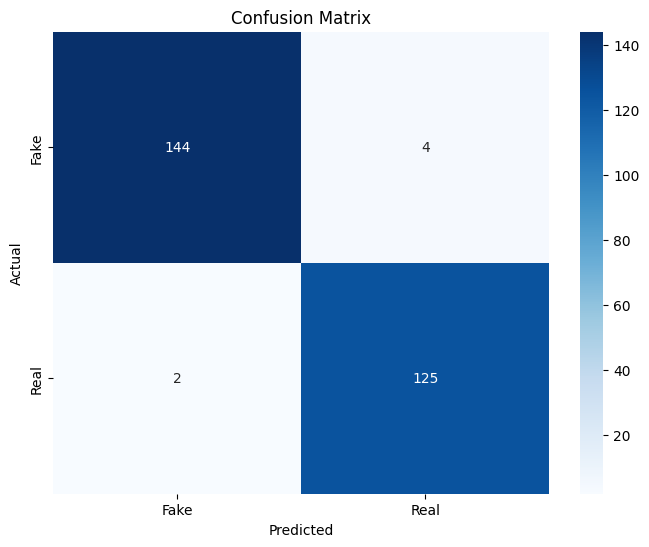

In [79]:
import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Fake', 'Real'],
 yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [81]:
# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Print the AUC score
print(f'ROC AUC Score: {auc:.5f}')


ROC AUC Score: 0.99947


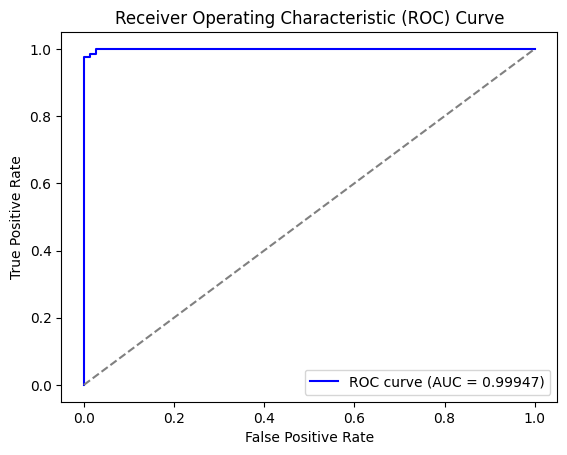

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict the probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**Model Training with L2-Regularization**

In [88]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
model_reg = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)
# Train the model
model_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=20)

**Model Evaluation**

Accuracy: 0.9781818181818182
Confusion Matrix:
 [[144   4]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       148
           1       0.97      0.98      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



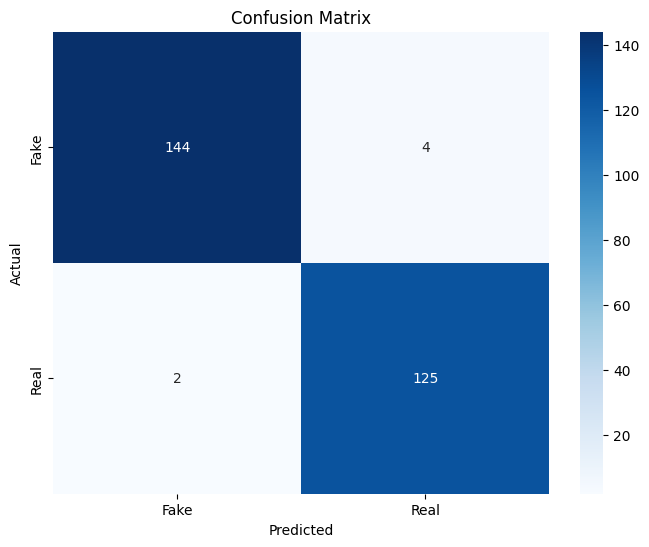

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model_reg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Fake', 'Real'],
 yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()




AUC: 0.9994679719089169


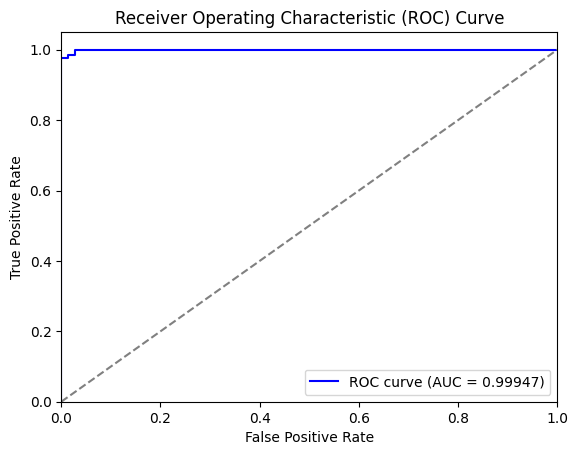

In [90]:
# Predict the probabilities for the positive class (class 1)
y_prob = model_reg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Print the AUC
print("AUC:", auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**Model Training with L2-Regularization after applying Grid Search**

In [83]:
from sklearn.model_selection import GridSearchCV


In [84]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers for logistic regression
}


**Initialization of Model**

In [85]:
# Initialize the logistic regression model
model_reg = LogisticRegression(penalty='l2', class_weight='balanced', random_state=20)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_reg, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)


**Fitting Model**

In [86]:
# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameters: {'C': 100, 'solver': 'liblinear'}


**Model Evaluation**

Accuracy: 0.9854545454545455
Confusion Matrix:
 [[146   2]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



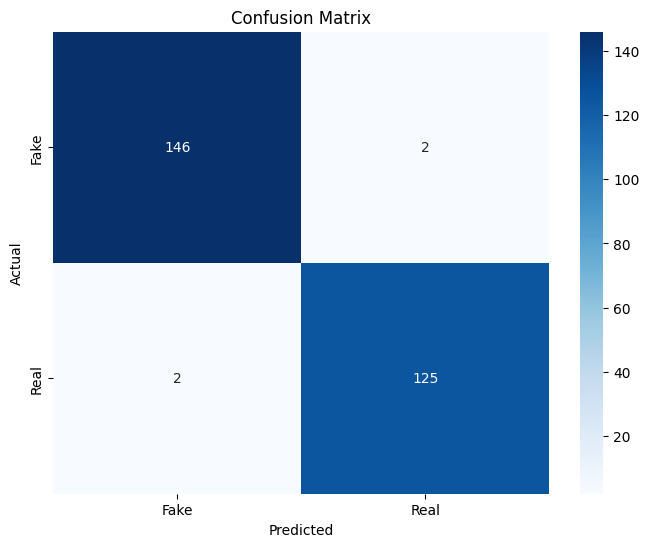

AUC: 0.9996275803362418


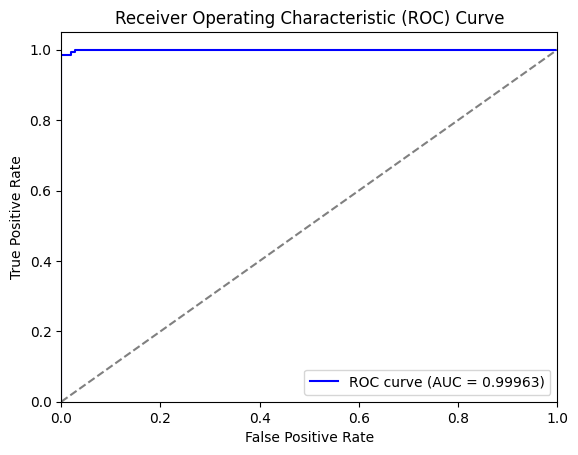

In [87]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Predict the probabilities for the positive class (class 1)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Print the AUC
print("AUC:", auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.5f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random performance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#**Results of MiniChallenge**



#### 1. Model Training without Regularization
The initial logistic regression model was trained without any regularization, achieving an **accuracy of 97.82%**. The confusion matrix showed that there were 144 true negatives and 125 true positives, with 4 false positives and 2 false negatives. The classification report indicated a precision of 0.99 for Class 0 and 0.97 for Class 1, along with a recall of 0.97 for Class 0 and 0.98 for Class 1. The F1-scores were 0.98 for both classes. The ROC AUC score for this model was **0.9995**.

#### 2. Model Training with L2 Regularization
The model was then retrained using L2 regularization, which yielded similar results, maintaining an **accuracy of 97.82%**. The confusion matrix remained the same, with 144 true negatives, 125 true positives, 4 false positives, and 2 false negatives. The classification report showed a precision of 0.99 for Class 0 and 0.97 for Class 1, with recall values of 0.97 and 0.98, respectively. The F1-scores continued to reflect strong performance at 0.98 for both classes. The AUC score was again **0.9995**.

#### 3. Model Training with L2 Regularization (After Applying Grid Search)
Finally, after applying Grid Search for hyperparameter tuning on the L2-regularized model, the accuracy improved to **98.55%**. The confusion matrix showed a notable reduction in false positives, with 146 true negatives and 125 true positives, alongside 2 false positives and 2 false negatives. The classification report revealed a precision of 0.99 for Class 0 and 0.98 for Class 1, with both classes achieving a recall of 0.98. The F1-scores remained robust at 0.99 for both classes. The AUC score increased slightly to **0.9996**.

In conclusion, the implementation of L2 regularization and subsequent hyperparameter tuning through Grid Search led to enhanced model performance while retaining high precision and recall across both classes.
